## Heart_Disease_Prediction Using Machine Learning

    Standard Library Imports
    import data

    This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

    We're going to take the following approach:

        Problem definition
        Data
        Evaluation
        Features
        Modelling
        Experimentation

***Preparing the tools***

In [3]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Load data

In [5]:
df_heart=pd.read_csv("Heart_Disease_Prediction.csv")
df_heart.head(10) #First 10 rows of Data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


 ***Data Description :-***
 
    age - age in years
    Chest pain type
    sex - (1 = male; 0 = female)
    BP - blood pressure (in mm Hg on admission to the hospital)
    Cholesterol - serum cholestoral in mg/dl
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    EKG - resting electrocardiographic results
    Max HR - maximum heart rate achieved
    Exercise angina - exercise induced angina (1 = yes; 0 = no)
    ST depression - ST depression induced by exercise relative to rest
    Slope of ST- the slope of the peak exercise ST segment
    Number of vessels fluro	- number of major vessels (0-3) colored by flourosopy
    Thallium- 3 = normal; 6 = fixed defect; 7 = reversable defect
    Heart Disease - have disease or not (Presence=yes, Absence=no)

In [6]:
df_heart.shape

(270, 14)

In [7]:
df_heart.rename(columns={'Heart Disease':'Target','Max HR':'Max_HR','Chest pain type':'CP','Slope of ST':'Slope'}, inplace=True)
df_heart.head(5)

,Age,Sex,CP,BP,Cholesterol,FBS over 120,EKG results,Max_HR,Exercise angina,ST depression,Slope,Number of vessels fluro,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


***Data Exploration (exploratory data analysis or EDA)***
    
    What question(s) are you trying to solve?
    What kind of data do we have and how do we treat different types?
    What's missing from the data and how do you deal with it?
    Where are the outliers and why should you care about them?
    How can you add, change or remove features to get more out of your data?

In [8]:
df_heart.head()

,Age,Sex,CP,BP,Cholesterol,FBS over 120,EKG results,Max_HR,Exercise angina,ST depression,Slope,Number of vessels fluro,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [9]:
df_heart.tail()

,Age,Sex,CP,BP,Cholesterol,FBS over 120,EKG results,Max_HR,Exercise angina,ST depression,Slope,Number of vessels fluro,Thallium,Target
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


***Checking null values.***

In [10]:
# Are there any missing values?
df_heart.isnull().sum()

Age                        0
Sex                        0
CP                         0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max_HR                     0
Exercise angina            0
ST depression              0
Slope                      0
Number of vessels fluro    0
Thallium                   0
Target                     0
dtype: int64

In [11]:
df_heart.notnull().sum()

Age                        270
Sex                        270
CP                         270
BP                         270
Cholesterol                270
FBS over 120               270
EKG results                270
Max_HR                     270
Exercise angina            270
ST depression              270
Slope                      270
Number of vessels fluro    270
Thallium                   270
Target                     270
dtype: int64

In [12]:
df_heart.describe()

,Age,Sex,CP,BP,Cholesterol,FBS over 120,EKG results,Max_HR,Exercise angina,ST depression,Slope,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [13]:
df_heart.var()

Age                          82.975093
Sex                           0.219207
CP                            0.902671
BP                          319.037051
Cholesterol                2671.467107
FBS over 120                  0.126669
EKG results                   0.995787
Max_HR                      536.650434
Exercise angina               0.221795
ST depression                 1.311506
Slope                         0.377475
Number of vessels fluro       0.890940
Thallium                      3.766157
dtype: float64

***Normalisation***

    Feature Scaling.

    In other words, making sure all of your numerical data is on the same scale.

In [14]:
#We can see ,there is a huge variance.So,we should normalise it.

df_heart['BP']=np.log(df_heart['BP'])
df_heart['Cholesterol']=np.log(df_heart['Cholesterol'])
df_heart['Max_HR']=np.log(df_heart['Max_HR'])

In [15]:
df_heart.var()

Age                        82.975093
Sex                         0.219207
CP                          0.902671
BP                          0.017627
Cholesterol                 0.040101
FBS over 120                0.126669
EKG results                 0.995787
Max_HR                      0.027744
Exercise angina             0.221795
ST depression               1.311506
Slope                       0.377475
Number of vessels fluro     0.890940
Thallium                    3.766157
dtype: float64

In [16]:
df_heart.dtypes

Age                          int64
Sex                          int64
CP                           int64
BP                         float64
Cholesterol                float64
FBS over 120                 int64
EKG results                  int64
Max_HR                     float64
Exercise angina              int64
ST depression              float64
Slope                        int64
Number of vessels fluro      int64
Thallium                     int64
Target                      object
dtype: object

In [17]:
df_heart

,Age,Sex,CP,BP,Cholesterol,FBS over 120,EKG results,Max_HR,Exercise angina,ST depression,Slope,Number of vessels fluro,Thallium,Target
0,70,1,4,4.867534,5.774552,0,2,4.691348,0,2.4,2,3,3,Presence
1,67,0,3,4.744932,6.335054,0,2,5.075174,0,1.6,2,0,7,Absence
2,57,1,2,4.820282,5.564520,0,0,4.948760,0,0.3,1,0,7,Presence
3,64,1,4,4.852030,5.572154,0,0,4.653960,1,0.2,2,1,7,Absence
4,74,0,2,4.787492,5.594711,0,2,4.795791,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,5.147494,5.293305,1,0,5.087596,0,0.5,1,0,7,Absence
266,44,1,2,4.787492,5.572154,0,0,5.153292,0,0.0,1,0,7,Absence
267,56,0,2,4.941642,5.683580,0,2,5.030438,0,1.3,2,0,3,Absence
268,57,1,4,4.941642,5.257495,0,0,4.997212,0,0.4,2,0,6,Absence


In [18]:
df_heart["Target"].value_counts()

Absence     150
Presence    120
Name: Target, dtype: int64

In [19]:
df_heart["Thallium"].value_counts()

3    152
7    104
6     14
Name: Thallium, dtype: int64

1.1 Make sure all our Data's are Numerical

***Build Machine Learning Model***
      
      Machine Learning model cannot deal with strings,hence (df_heart["Heart Disease"]) categories needs to be convereted to numerical form.


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_heart["Target"] = encoder.fit_transform(df_heart["Target"])
df_heart


,Age,Sex,CP,BP,Cholesterol,FBS over 120,EKG results,Max_HR,Exercise angina,ST depression,Slope,Number of vessels fluro,Thallium,Target
0,70,1,4,4.867534,5.774552,0,2,4.691348,0,2.4,2,3,3,1
1,67,0,3,4.744932,6.335054,0,2,5.075174,0,1.6,2,0,7,0
2,57,1,2,4.820282,5.564520,0,0,4.948760,0,0.3,1,0,7,1
3,64,1,4,4.852030,5.572154,0,0,4.653960,1,0.2,2,1,7,0
4,74,0,2,4.787492,5.594711,0,2,4.795791,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,5.147494,5.293305,1,0,5.087596,0,0.5,1,0,7,0
266,44,1,2,4.787492,5.572154,0,0,5.153292,0,0.0,1,0,7,0
267,56,0,2,4.941642,5.683580,0,2,5.030438,0,1.3,2,0,3,0
268,57,1,4,4.941642,5.257495,0,0,4.997212,0,0.4,2,0,6,0


In [21]:

# Compare target column with sex column
pd.crosstab(df_heart.Target, df_heart.Sex)

Sex,0,1
Target,,
0,67,83
1,20,100


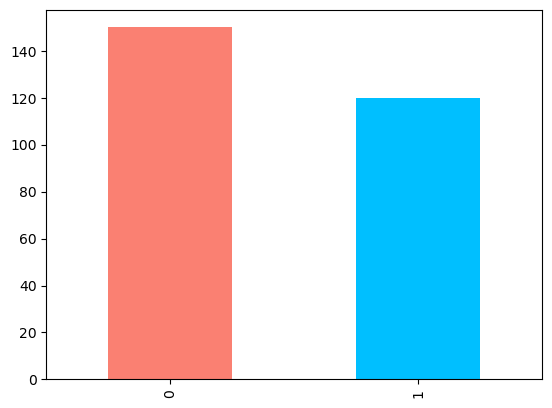

In [22]:
df_heart["Target"].value_counts().plot(kind="bar", color=["salmon", "deepskyblue"]);

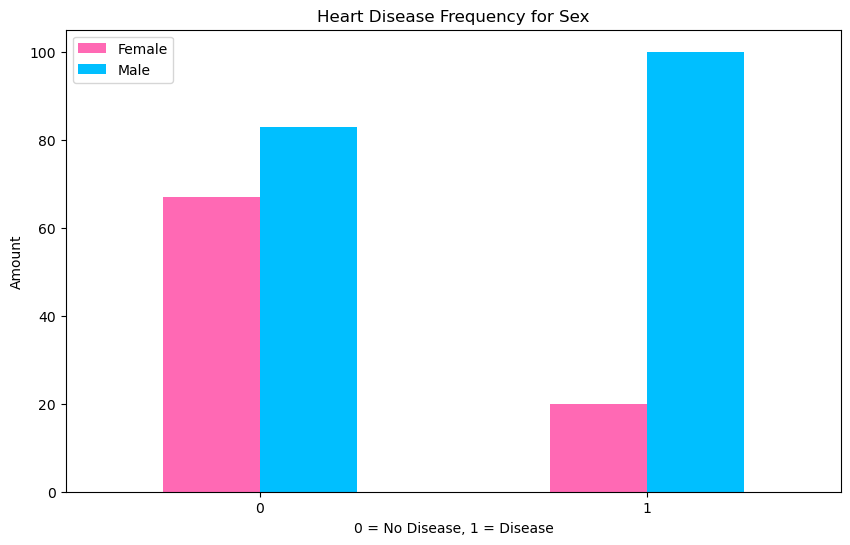

In [23]:
# Create a plot of crosstab
pd.crosstab(df_heart.Target, df_heart.Sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["hotpink", "deepskyblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

***Age vs. Max Heart Rate for Heart Disease***

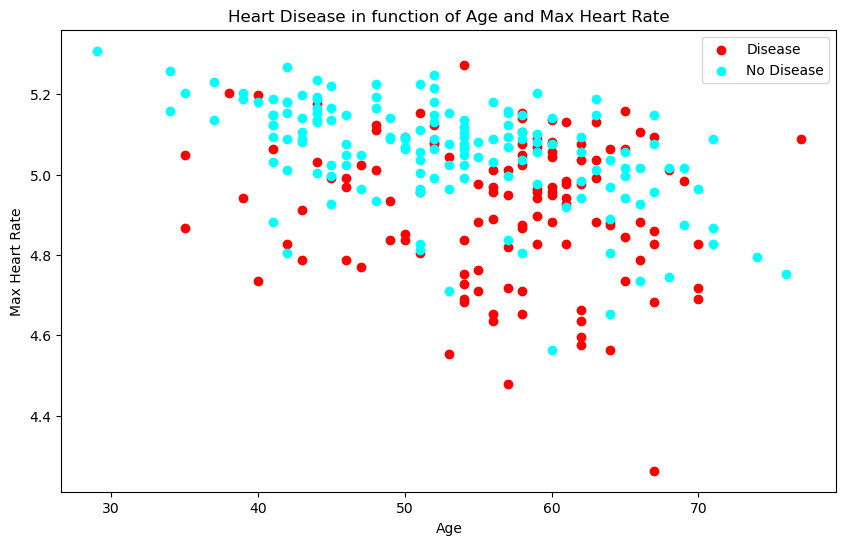

In [24]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive 
plt.scatter(df_heart.Age[df_heart.Target==1],
            df_heart.Max_HR[df_heart.Target==1],
            c="red")

# Scatter with negative 
plt.scatter(df_heart.Age[df_heart.Target==0],
            df_heart.Max_HR[df_heart.Target==0],
            c="aqua")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

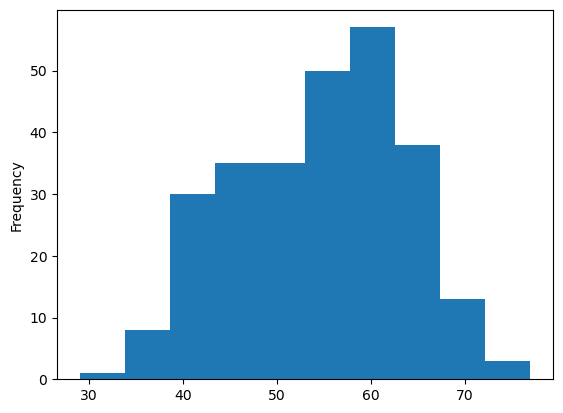

In [25]:
# Check the distribution of the age column with a histogram
df_heart.Age.plot.hist();

    Heart Disease Frequency per Chest Pain Type
        Chest pain type 
        1: Typical angina: chest pain related decrease blood supply to the heart
        2: Atypical angina: chest pain not related to heart
        3: Non-anginal pain: typically esophageal spasms (non heart related)
        4: Asymptomatic: chest pain not showing signs of disease

In [26]:
df_heart["CP"].value_counts()

4    129
3     79
2     42
1     20
Name: CP, dtype: int64

In [27]:
pd.crosstab(df_heart.CP, df_heart.Target)

Target,0,1
CP,,
1,15,5
2,35,7
3,62,17
4,38,91


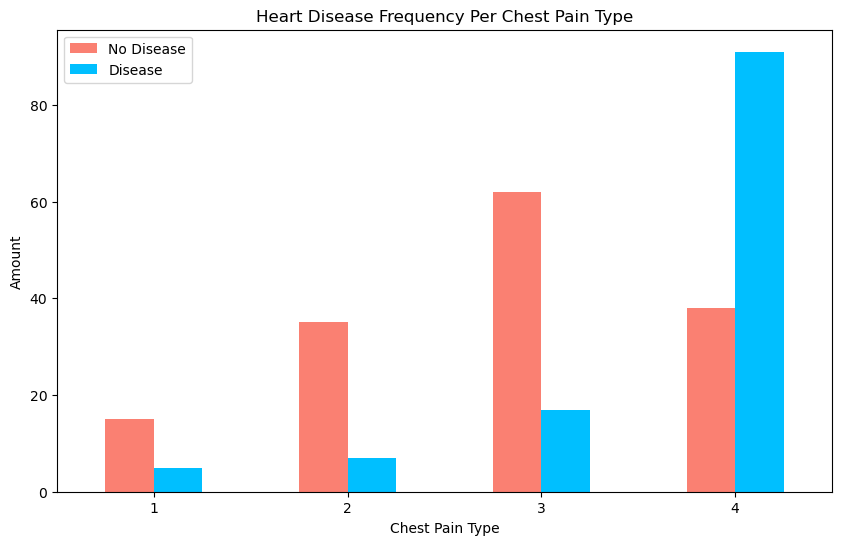

In [28]:
# Make the crosstab more visual
pd.crosstab(df_heart.CP, df_heart.Target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "deepskyblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [29]:
# Make a correlation matrix
df_heart.corr()

,Age,Sex,CP,BP,Cholesterol,FBS over 120,EKG results,Max_HR,Exercise angina,ST depression,Slope,Number of vessels fluro,Thallium,Target
Age,1.000000,-0.094401,0.096920,0.270029,0.213916,0.123458,0.128171,-0.382835,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.053920,-0.172694,0.042140,0.039253,-0.085256,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
CP,0.096920,0.034636,1.000000,-0.043993,0.084004,-0.098537,0.074325,-0.309459,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.270029,-0.053920,-0.043993,1.000000,0.183682,0.152334,0.119513,-0.034261,0.075106,0.224112,0.139475,0.087156,0.127447,0.153242
Cholesterol,0.213916,-0.172694,0.084004,0.183682,1.000000,0.025237,0.166485,-0.015096,0.090810,0.013899,-0.009452,0.132249,0.021567,0.131493
FBS over 120,0.123458,0.042140,-0.098537,0.152334,0.025237,1.000000,0.053499,0.026635,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.119513,0.166485,0.053499,1.000000,-0.061279,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max_HR,-0.382835,-0.085256,-0.309459,-0.034261,-0.015096,0.026635,-0.061279,1.000000,-0.368889,-0.335419,-0.381780,-0.253861,-0.240756,-0.412401
Exercise angina,0.098297,0.180022,0.353160,0.075106,0.090810,-0.004107,0.095098,-0.368889,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.224112,0.013899,-0.025538,0.120034,-0.335419,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


(14.5, -0.5)

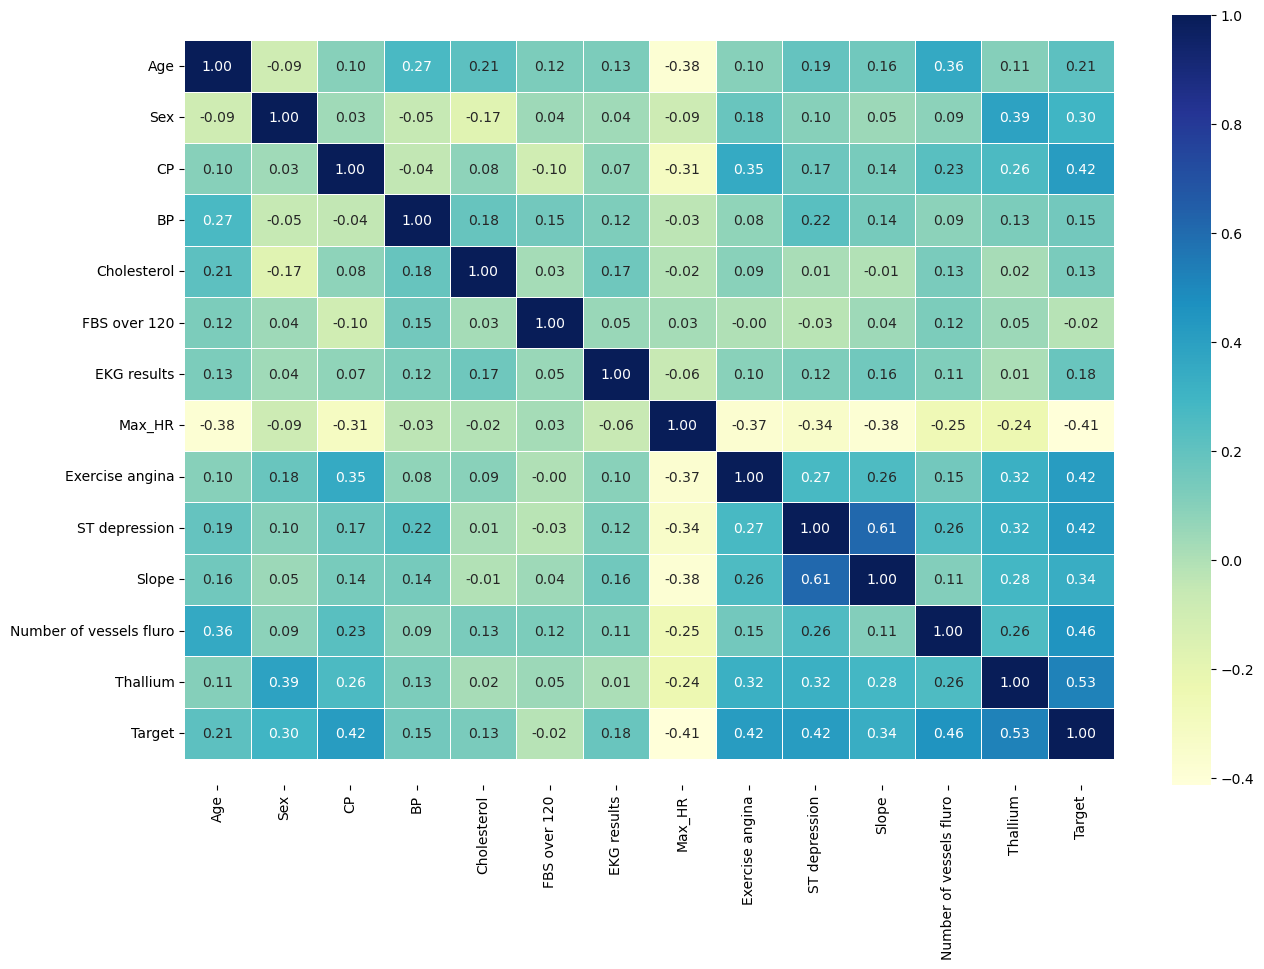

In [30]:
# Let's make our correlation matrix 
corr_matrix = df_heart.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Modelling

In [31]:
# Split data into X and y
x = df_heart.drop("Target", axis=1)

y = df_heart["Target"]
x

,Age,Sex,CP,BP,Cholesterol,FBS over 120,EKG results,Max_HR,Exercise angina,ST depression,Slope,Number of vessels fluro,Thallium
0,70,1,4,4.867534,5.774552,0,2,4.691348,0,2.4,2,3,3
1,67,0,3,4.744932,6.335054,0,2,5.075174,0,1.6,2,0,7
2,57,1,2,4.820282,5.564520,0,0,4.948760,0,0.3,1,0,7
3,64,1,4,4.852030,5.572154,0,0,4.653960,1,0.2,2,1,7
4,74,0,2,4.787492,5.594711,0,2,4.795791,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,5.147494,5.293305,1,0,5.087596,0,0.5,1,0,7
266,44,1,2,4.787492,5.572154,0,0,5.153292,0,0.0,1,0,7
267,56,0,2,4.941642,5.683580,0,2,5.030438,0,1.3,2,0,3
268,57,1,4,4.941642,5.257495,0,0,4.997212,0,0.4,2,0,6


In [32]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Target, Length: 270, dtype: int32

In [31]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [32]:
x_train

,Age,Sex,CP,BP,Cholesterol,FBS over 120,EKG results,Max_HR,Exercise angina,ST depression,Slope,Number of vessels fluro,Thallium
115,49,0,2,4.897840,5.602119,0,0,5.087596,0,0.0,2,0,3
33,59,1,4,5.135798,5.786897,0,2,4.941642,1,3.4,3,0,7
184,53,1,3,4.867534,5.505332,1,2,5.153292,0,0.0,1,3,3
142,50,1,3,4.941642,5.451038,0,0,5.093750,0,0.6,2,1,7
197,54,0,3,4.700480,5.365976,0,0,5.062595,0,1.6,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,67,1,4,4.787492,5.433722,0,2,4.859812,1,2.6,2,2,7
188,62,0,4,4.941642,5.976351,0,2,5.056246,0,1.2,2,0,3
71,57,0,4,4.787492,5.869297,0,0,5.093750,1,0.6,1,0,3
106,51,1,3,4.605170,5.402677,0,0,4.962845,1,1.2,2,0,3


In [33]:
y_train

115    0
33     1
184    0
142    1
197    0
      ..
20     1
188    0
71     0
106    0
102    0
Name: Target, Length: 216, dtype: int32

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

***Logistic Regression***

***K-Nearest Neighbours Classifier***

***Random Forest Classifier***

***2.Choosing the right maching learning estimator/aglorithm/model for your problem***

In [34]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [35]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.9074074074074074,
 'KNN': 0.7407407407407407,
 'Random Forest': 0.7962962962962963}

## Model Comparison

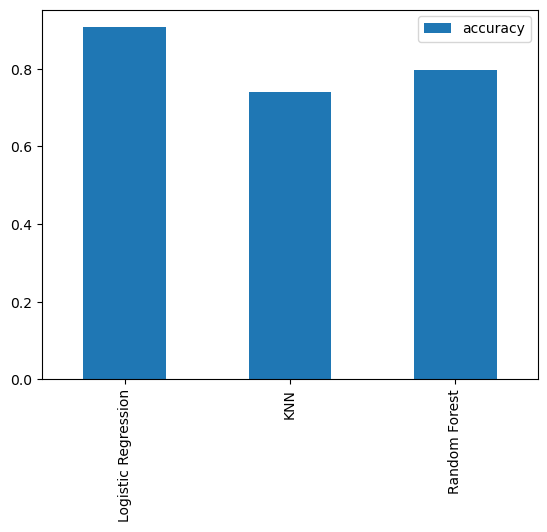

In [36]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

    Now we've got a baseline model..

    Let's look at the following:

    Hypyterparameter tuning
    Feature importance
    Confusion matrix
    Cross-validation
    Precision
    Recall
    F1 score
    Classification report
    ROC curve
    Area under the curve (AUC)

***Hyperparameter tuning***

In [37]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [38]:
train_scores

[1.0,
 0.8888888888888888,
 0.8796296296296297,
 0.8657407407407407,
 0.8472222222222222,
 0.8148148148148148,
 0.8194444444444444,
 0.8287037037037037,
 0.8148148148148148,
 0.8194444444444444,
 0.8287037037037037,
 0.8194444444444444,
 0.8240740740740741,
 0.8194444444444444,
 0.8101851851851852,
 0.8009259259259259,
 0.8055555555555556,
 0.7870370370370371,
 0.7824074074074074,
 0.7731481481481481]

In [39]:
test_scores

[0.7407407407407407,
 0.7222222222222222,
 0.7592592592592593,
 0.7777777777777778,
 0.7407407407407407,
 0.7592592592592593,
 0.7592592592592593,
 0.7407407407407407,
 0.7407407407407407,
 0.7407407407407407,
 0.7407407407407407,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7962962962962963,
 0.7777777777777778,
 0.7962962962962963,
 0.7777777777777778,
 0.7962962962962963,
 0.7962962962962963]

Maximum KNN score on the test data: 79.63%


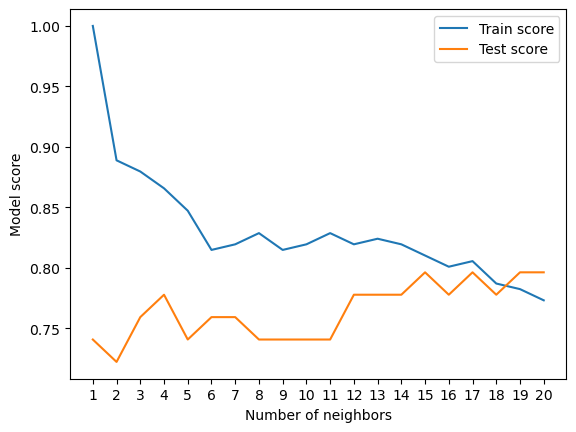

In [40]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

***Hyperparameter tuning with RandomizedSearchCV***

    We're going to tune:

    LogisticRegression()
    RandomForestClassifier()
... using RandomizedSearchCV

In [41]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [42]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [44]:
rs_log_reg.score(x_test, y_test)

0.9074074074074074

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [45]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [46]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [47]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8518518518518519

***Hyperparamter Tuning with GridSearchCV***

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [48]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [49]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [50]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.9074074074074074

## Evaluting our tuned machine learning classifier, beyond accuracy

    ROC curve and AUC score
    Confusion matrix
    Classification report
    Precision
    Recall
    F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [51]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [52]:
y_preds

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [53]:
y_test

30     1
116    1
79     0
127    0
196    0
137    1
209    0
45     0
158    0
247    0
183    0
268    0
227    1
82     1
165    0
194    0
226    1
146    1
104    1
60     0
221    1
266    0
46     1
42     0
185    0
9      1
22     0
199    1
109    0
24     0
113    0
68     0
144    1
224    0
252    1
6      1
120    1
67     1
119    1
118    0
25     0
125    0
244    0
19     0
77     0
216    0
90     0
208    1
93     1
180    0
15     0
152    0
232    0
250    1
Name: Target, dtype: int32

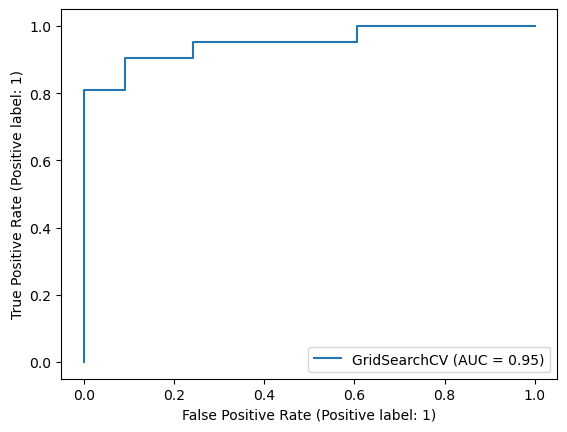

In [54]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [55]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[32  1]
 [ 4 17]]


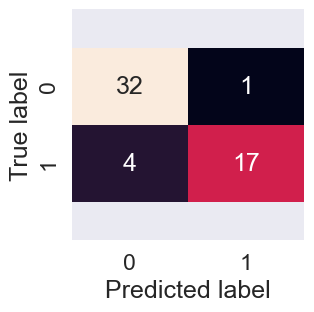

In [73]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [57]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().



In [58]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [59]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [60]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.7962963 , 0.83333333, 0.87037037, 0.83333333, 0.85185185])

In [61]:
cv_acc = np.mean(cv_acc)
cv_acc

0.837037037037037

In [62]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8290750988142292

In [63]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.7999999999999999

In [64]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8139364533972702

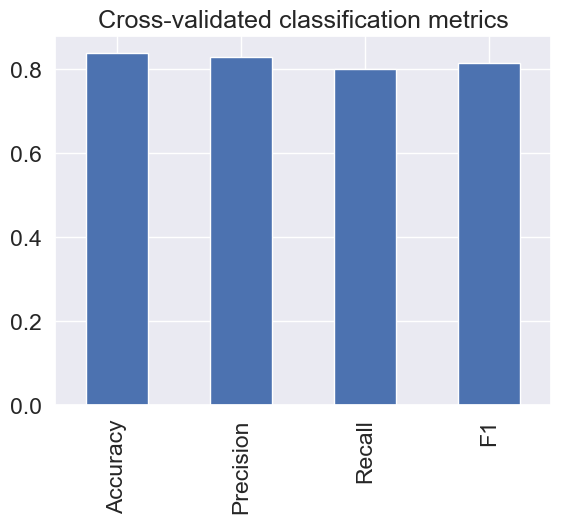

In [65]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature Importance
Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [66]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train);

In [67]:
# Check coef_
clf.coef_

array([[-0.00590947,  0.36436019,  0.51040597, -0.18138793, -0.19350582,
        -0.23607095,  0.14579669, -0.64888885,  0.49769123,  0.53540293,
         0.29109254,  0.65352273,  0.37130532]])

In [68]:
df_heart.head()

,Age,Sex,CP,BP,Cholesterol,FBS over 120,EKG results,Max_HR,Exercise angina,ST depression,Slope,Number of vessels fluro,Thallium,Target
0,70,1,4,4.867534,5.774552,0,2,4.691348,0,2.4,2,3,3,1
1,67,0,3,4.744932,6.335054,0,2,5.075174,0,1.6,2,0,7,0
2,57,1,2,4.820282,5.564520,0,0,4.948760,0,0.3,1,0,7,1
3,64,1,4,4.852030,5.572154,0,0,4.653960,1,0.2,2,1,7,0
4,74,0,2,4.787492,5.594711,0,2,4.795791,1,0.2,1,1,3,0


In [69]:
# Match coef's of features to columns
feature_dict = dict(zip(df_heart.columns, list(clf.coef_[0])))
feature_dict

{'Age': -0.005909470582892799,
 'Sex': 0.36436019390391255,
 'CP': 0.5104059746492782,
 'BP': -0.181387934899211,
 'Cholesterol': -0.19350581824472526,
 'FBS over 120': -0.23607095131951472,
 'EKG results': 0.14579669280609167,
 'Max_HR': -0.6488888516772208,
 'Exercise angina': 0.4976912341406632,
 'ST depression': 0.5354029254400311,
 'Slope': 0.2910925364303487,
 'Number of vessels fluro': 0.6535227281493187,
 'Thallium': 0.37130531534917377}

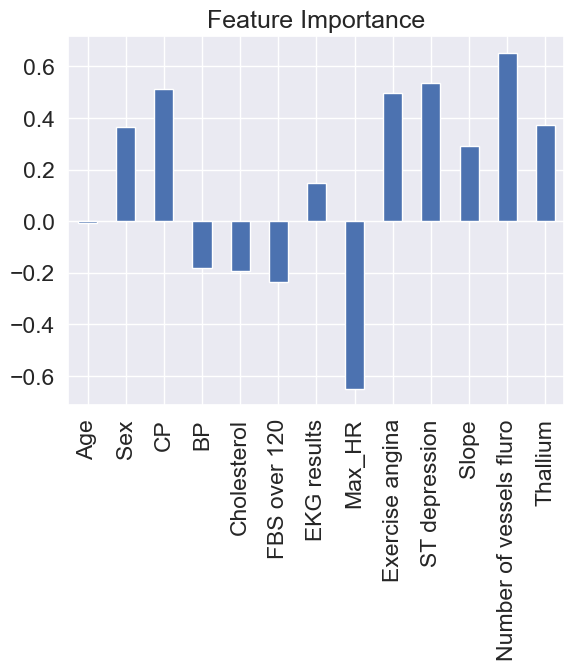

In [70]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [71]:
pd.crosstab(df_heart["Sex"], df_heart["Target"])

Target,0,1
Sex,,
0,67,20
1,83,100


In [72]:
pd.crosstab(df_heart["Slope"], df_heart["Target"])

Target,0,1
Slope,,
1,98,32
2,44,78
3,8,10


slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart